In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

#mglearn.plots.plot_logistic_regression_graph()

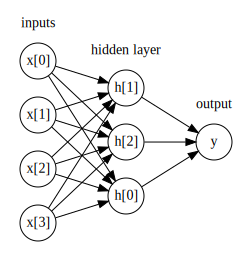

In [2]:
mglearn.plots.plot_single_hidden_layer_graph()

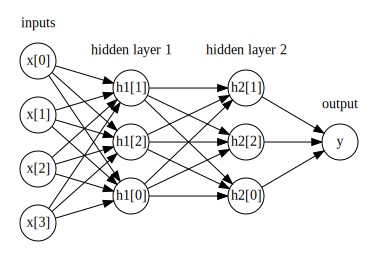

In [3]:
mglearn.plots.plot_two_hidden_layer_graph()

# Dependencies

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Dataset 


[Breast Cancer Wisconsin (Diagnostic) Data Set](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

Targets: (2 for benign, 4 for malignant)


Note: *Some values in this dataset are '?' and then set to 0*

In [5]:
# Headers
att = ['ID','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
       'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','target']

cancer = pd.read_csv('breast-cancer-wisconsin.txt',header=None,names=att,dtype='float')
cancer = cancer.drop('ID',1)

target = cancer['target'].as_matrix()

data = np.array(cancer.drop('target',1).as_matrix())

### Training

In [6]:
MEANING_OF_LIFE = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=MEANING_OF_LIFE)

# hyperparameters
#solver='lbfgs', hidden_layer_sizes=[100], max_iter=2000, activation='logistic'

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100], alpha=1,max_iter=2000,
                    activation='logistic',random_state=MEANING_OF_LIFE)
mlp.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))



Accuracy on the training subset: 0.979
Accuracy on the test subset: 0.960


# Comparison between predicted output vs target

In [7]:
predictions=[]
for i in range(0, len(data)):
    predictions.append(int(mlp.predict(data[i].reshape(1,-1))))

In [8]:
from collections import Counter
f=Counter(predictions)
g=Counter(target)

In [9]:
f,g

(Counter({2: 456, 4: 243}), Counter({2.0: 458, 4.0: 241}))

# Improving NN performance

# Data visualization
Cast headers to a numpy array

In [10]:
feature_names = np.array(att[1:len(att)-1])
feature_names

array(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses'], 
      dtype='<U27')

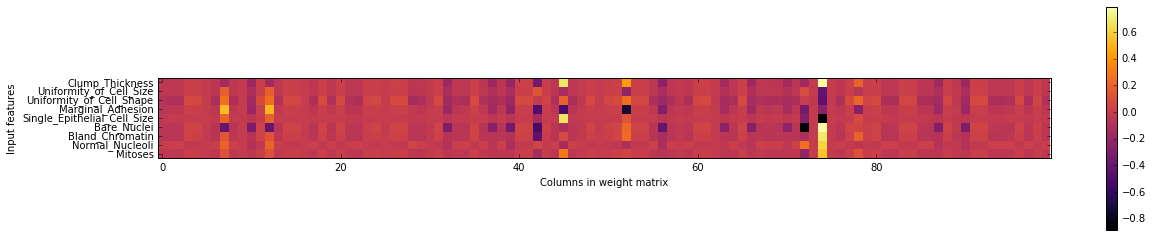

In [11]:
plt.figure(figsize=(20,4))
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='inferno')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input features')
plt.colorbar()

# Save model

In [12]:
import pickle

filename = 'Final_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

# load the model from disk



In [13]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(data[10].reshape(1,-1))

array([ 2.])

In [15]:
list(data[10])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0]